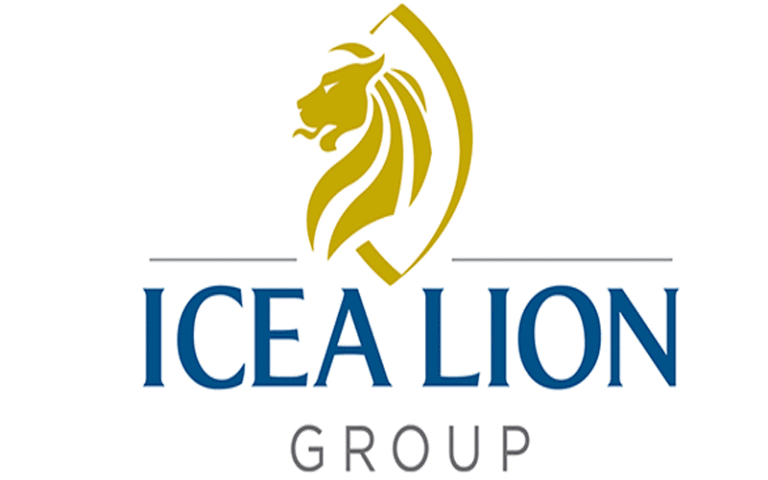

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\kelvin\IceLion.png",width=600,height=400)

# Importing and Preparing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import font_manager as fm


import warnings
warnings.filterwarnings(action='ignore')
import os

In [3]:
df =pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\DataScience\credit_risk_dataset_training.csv")
print(df.shape)
df.head()

(22850, 12)


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          23          65500                  RENT                4.0   
3          21           9900                   OWN                2.0   
4          26          77100                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C      35000          15.23            1   
3     VENTURE          A       2500           7.14            1   
4   EDUCATION          B      35000          12.42            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.53                         N                           2  
3                 0.25                         N                           2  
4                 0.45                         N                           3

In [4]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Figure size 432x432 with 0 Axes>

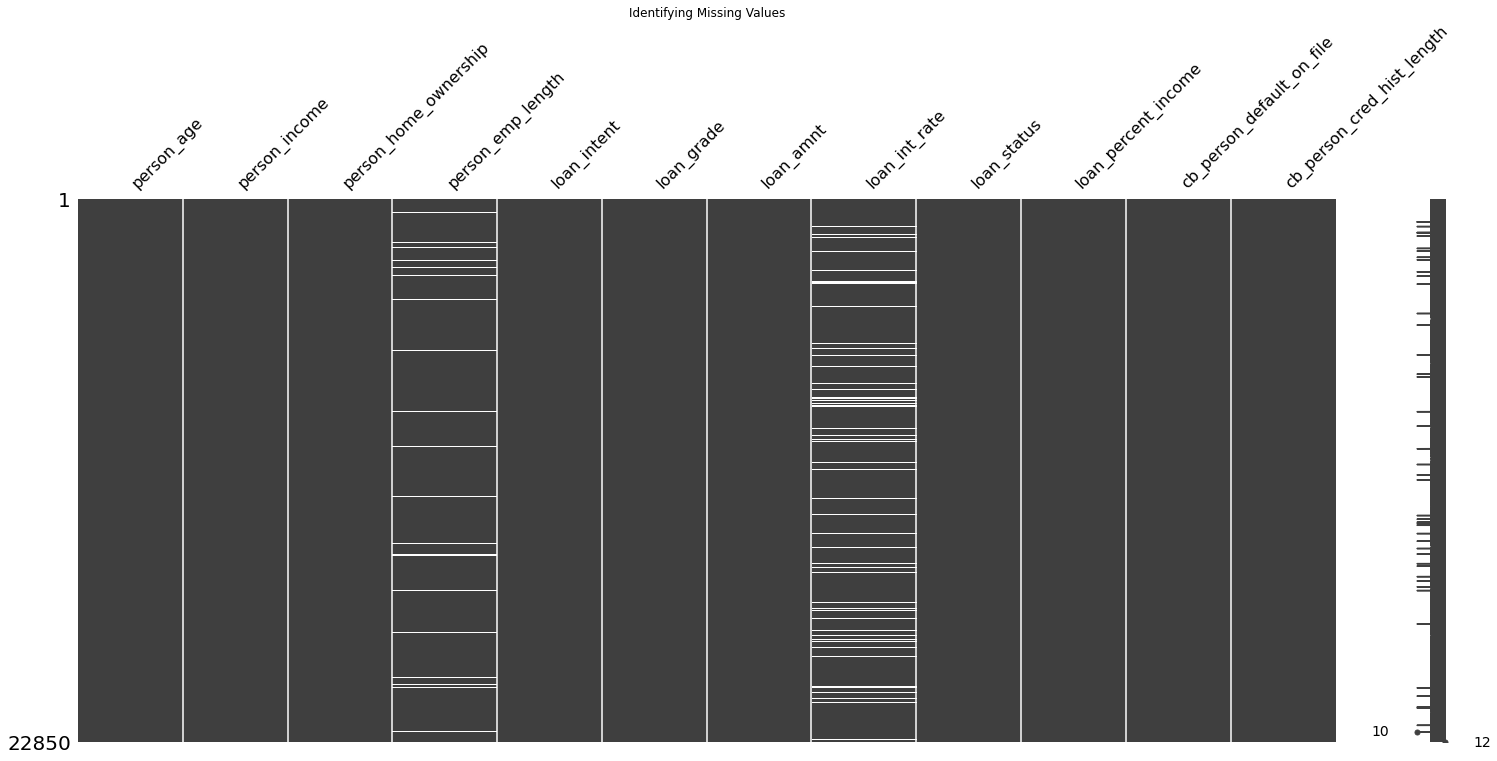

In [5]:
import missingno  as msn
plt.figure(figsize=(6,6))
msn.matrix(df)
plt.title('Identifying Missing Values');

In [6]:
def clean_column(cols):
    avg = cols.mean()
    return cols.fillna(avg)

df_clean = df.transform(clean_column)

In [7]:
df_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df_clean.select_dtypes('number').describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  22850.000000   2.285000e+04       22850.000000  22850.000000   
mean      27.717812   6.604363e+04           4.800018   9595.500000   
std        6.327822   6.423370e+04           4.056851   6327.603663   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.840000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.939500e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   22850.000000  22850.000000         22850.000000   
mean       11.014324      0.220306             0.170243   
std         3.087864      0.414462             0.106557   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        11.014324      0.000000             0.150000   
75%        13.110000      0.000000             0.230000   
max        23.220000      1.000000             0.780000   

       cb_person_cred_hist_length  
count                22850.000000  
mean                     5.801400  
std                      4.050767  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

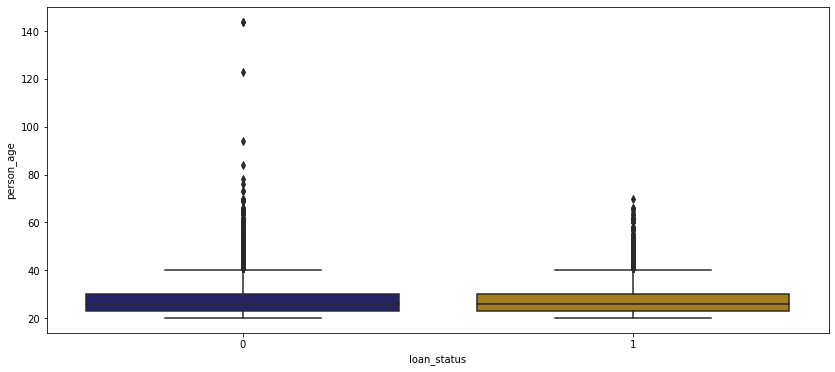

In [9]:
                    #using plotly
# df_tips = px.data.tips()
# px.box(df_clean, x= "loan_status",y="person_age",points = 'all')

                    #using seaborn
plt.figure(figsize=(14,6))    
# sns.set(style='darkgrid')
sns.boxplot(x="loan_status",y="person_age",data=df_clean,palette= ['#191970','#b8860b']);

In [10]:
print('Number of Outliers')
print(df_clean['person_age'].between(0,100).value_counts())
print('------------------------------------------------------------------------------------------------------------------------')
print('Viewing all dataset with Outliers')
df_clean[df_clean['person_age']>100]


Number of Outliers
True     22847
False        3
Name: person_age, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Viewing all dataset with Outliers


person_age  person_income person_home_ownership  person_emp_length  \
138           144         200000              MORTGAGE                4.0   
514           123          78000                  RENT                7.0   
22646         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
138     EDUCATION          B       6000      11.860000            0   
514       VENTURE          B      20000      11.014324            0   
22646    PERSONAL          C       5000      12.730000            0   

       loan_percent_income cb_person_default_on_file  \
138                   0.03                         N   
514                   0.26                         N   
22646                 0.00                         N   

       cb_person_cred_hist_length  
138                             2  
514                             4  
22646                          25

In [11]:
upper_q =df_clean['person_age'].quantile(0.999879)
lower_q = df_clean['person_age'].quantile(0.0001)
df_clean[df_clean['person_age'].between(lower_q,upper_q)]

dfclean = df_clean[df_clean['person_age'].between(lower_q,upper_q)]
dfclean.shape

(22847, 12)

# Data Exploration

# PART 1     

0    0.779665
1    0.220335
Name: loan_status, dtype: float64


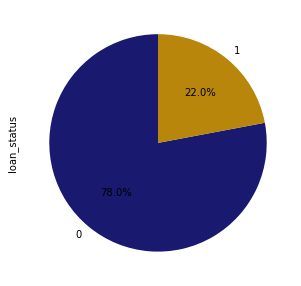

In [12]:
dfclean['loan_status'].value_counts().plot(kind='pie',figsize=(5, 5),autopct='%1.1f%%',
                                         startangle=90, 
                                         colors = ['#191970', '#b8860b'])
                                          
                                        
print(dfclean['loan_status'].value_counts(normalize=True))

What is the scatterplot Loan for Defaulters and Non-Defaulters?

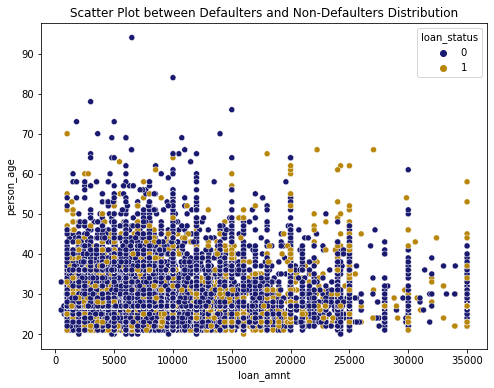

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclean['loan_amnt'],dfclean['person_age'],hue=dfclean['loan_status'],palette = ['#191970', '#b8860b'])
plt.title('Scatter Plot between Defaulters and Non-Defaulters Distribution');

In [14]:
print(round(dfclean[dfclean['loan_status']==0]['person_age'].corr(dfclean['loan_amnt']),0))
print(round(dfclean[dfclean['loan_status']==1]['person_age'].corr(dfclean['loan_amnt']),0))

0.0
0.0


In [15]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

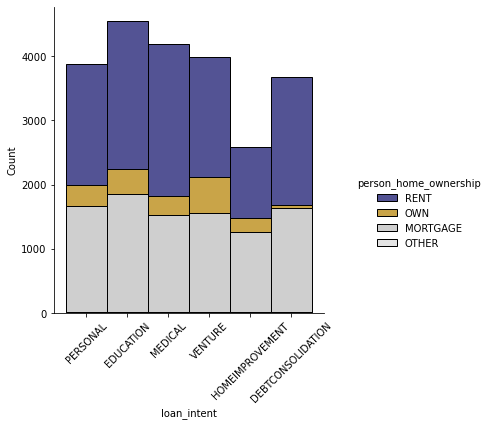

<Figure size 576x720 with 0 Axes>

In [16]:
sns.displot(data=dfclean ,x ='loan_intent',hue = 'person_home_ownership',multiple='stack',
         palette= ['#191970','#b8860b','#c0c0c0','#dcdcdc']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(8,10));

[None, None, None, None, None, None, None, None, None, None, None, None]

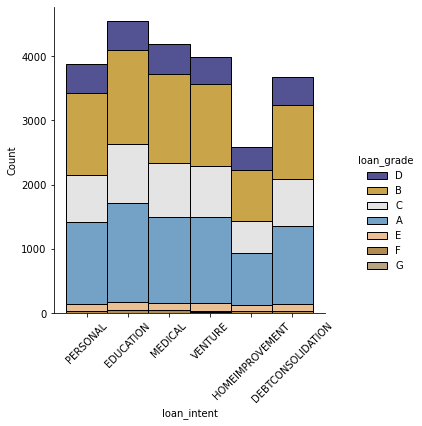

In [17]:
sns.displot(data=dfclean ,x ='loan_intent',hue = 'loan_grade',multiple='stack',
          palette= ['#191970','#b8860b','#dcdcdc','#4682b4','#e5aa70','#996515','#a28557']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [18]:
dfclean['cb_person_default_on_file'].value_counts(normalize=True)

N    0.822909
Y    0.177091
Name: cb_person_default_on_file, dtype: float64

[None, None, None, None, None, None, None, None, None, None, None, None]

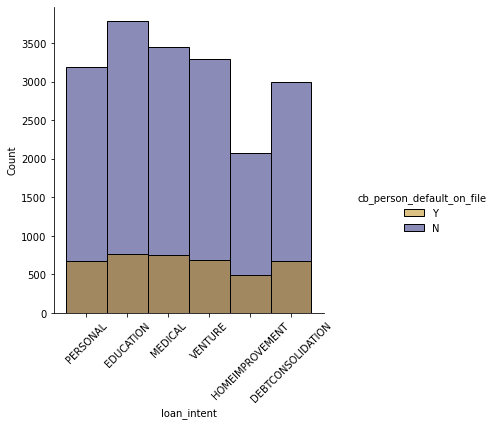

In [19]:
sns.displot(data=dfclean ,x ='loan_intent',hue= 'cb_person_default_on_file',
            palette= ['#b8860b','#191970']);  
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

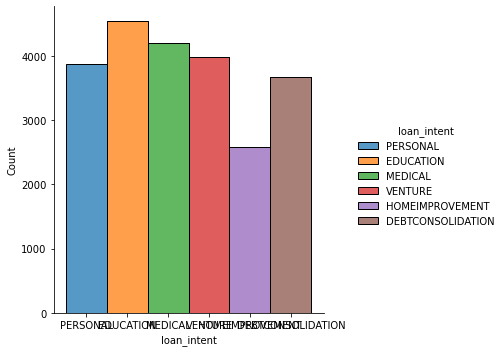

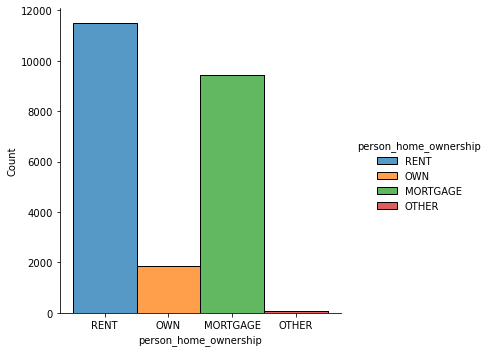

<Figure size 576x432 with 0 Axes>

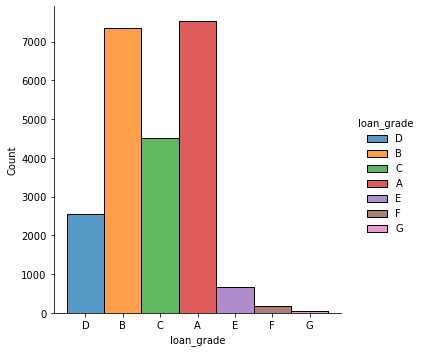

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

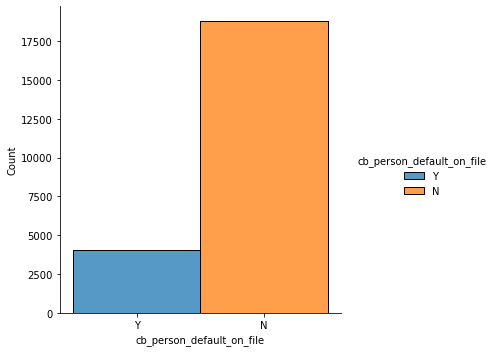

In [20]:
colors1=['#483d8b','#0000cd','#1d2951','#daa520','#f3e5ab','#9b870c','#e5aa70']

k=dfclean.select_dtypes('object')
for i,col in enumerate(k.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    sns.displot(data=k[col] ,x =k[col],hue = k[col],multiple='stack');     

In [21]:
dfcorr = dfclean.select_dtypes('number')
col_names = ['age','income','emp_length','amnt','int_rate','status','percent_income','cred_hist_length']
dfcorr.columns =col_names
dfcorr.corr()

age    income  emp_length      amnt  int_rate  \
age               1.000000  0.140140    0.166510  0.048046  0.012235   
income            0.140140  1.000000    0.149051  0.329548  0.000935   
emp_length        0.166510  0.149051    1.000000  0.108600 -0.052553   
amnt              0.048046  0.329548    0.108600  1.000000  0.142173   
int_rate          0.012235  0.000935   -0.052553  0.142173  1.000000   
status           -0.018257 -0.173994   -0.078318  0.106768  0.317130   
percent_income   -0.044384 -0.301270   -0.050537  0.573519  0.114079   
cred_hist_length  0.877503  0.120715    0.145044  0.040936  0.018586   

                    status  percent_income  cred_hist_length  
age              -0.018257       -0.044384          0.877503  
income           -0.173994       -0.301270          0.120715  
emp_length       -0.078318       -0.050537          0.145044  
amnt              0.106768        0.573519          0.040936  
int_rate          0.317130        0.114079          0.018586  
status            1.000000        0.377689         -0.013178  
percent_income    0.377689        1.000000         -0.033514  
cred_hist_length -0.013178       -0.033514          1.000000

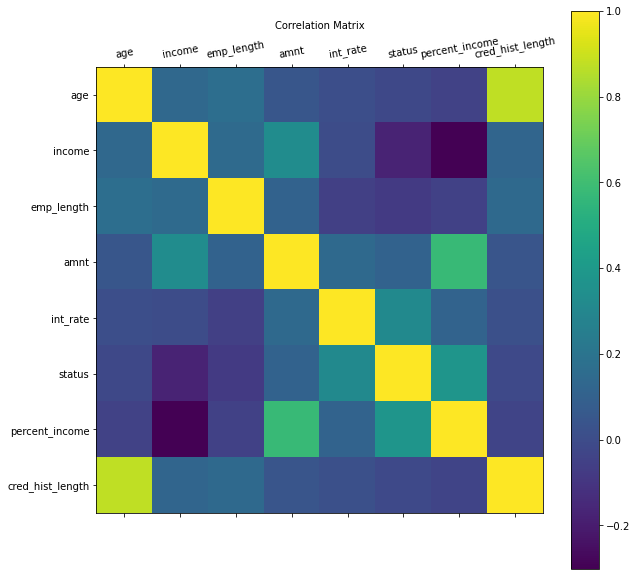

In [22]:
f=plt.figure(figsize=(10,10))
plt.matshow(dfcorr.select_dtypes('number').corr(), fignum=f.number)
plt.xticks(range(dfcorr.select_dtypes('number').shape[1]),dfcorr.select_dtypes(['number']).columns,fontsize=10,rotation=10)
plt.yticks(range(dfcorr.select_dtypes('number').shape[1]),dfcorr.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()

cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix',fontsize=10);
plt.show()

Compare the Loan intention and add trendline to gaugec equality?

loan_intent
HOMEIMPROVEMENT      73216.624515
PERSONAL             66778.555728
DEBTCONSOLIDATION    66700.272405
VENTURE              66357.658543
EDUCATION            64238.699516
MEDICAL              60591.892993
Name: person_income, dtype: float64

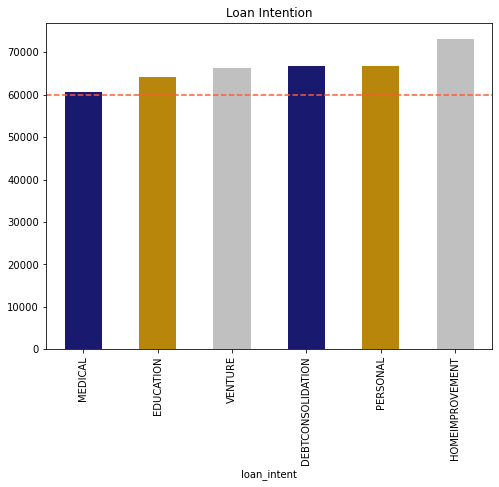

In [23]:
dfclean.groupby(['loan_intent'])['person_income'].mean().sort_values().plot(kind='bar',figsize=(8,6),
                            color=['#191970','#b8860b','#c0c0c0'])
plt.title('Loan Intention')
plt.axhline(y = 60000, color ="#ff5a36", linestyle ="--");
dfclean.groupby(['loan_intent'])['person_income'].mean().sort_values(ascending=False)

Compare the asset(person_home_ownership) and identify the least and most category for our borrowers.

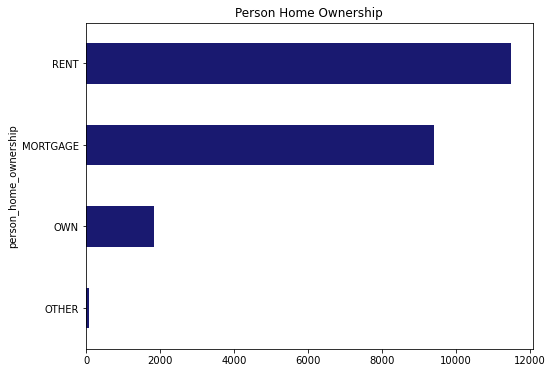

In [24]:
dfclean.groupby('person_home_ownership')['loan_status'].count().sort_values().plot(kind='barh',figsize=(8,6),color='#191970');
dfclean.groupby('person_home_ownership')['loan_status'].count()
plt.title("Person Home Ownership");

Compared different grade available

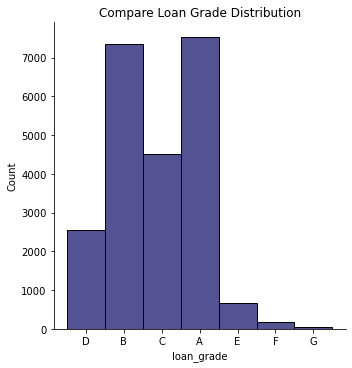

In [25]:
dfclean.groupby('loan_grade')['loan_status'].count().sort_values()
sns.displot(dfclean['loan_grade'],bins=False,kde=False,color='#191970')
plt.title('Compare Loan Grade Distribution');

            Non-Defaulters  Defaulters
loan_grade                            
A                   6779.0         755
B                   6137.0        1219
C                   3570.0         942
D                   1029.0        1531
E                    246.0         427
F                     52.0         120
G                      NaN          40


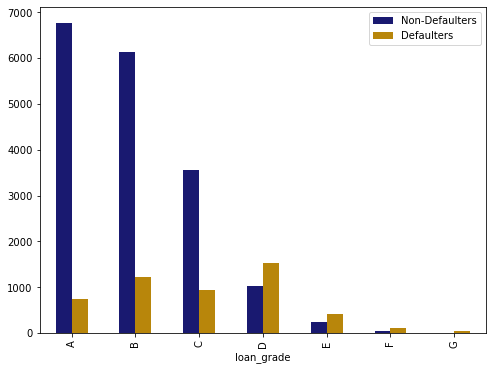

In [26]:

a= dfclean[dfclean['loan_status']==1].groupby('loan_grade').size().sort_values(ascending=False)
b =dfclean[dfclean['loan_status']==0].groupby('loan_grade').size().sort_values(ascending=False)
grade =pd.DataFrame(pd.concat([b,a],axis=1))
grade.columns=['Non-Defaulters','Defaulters']
print(grade)
grade.plot(kind='bar',figsize=(8,6),color=['#191970','#b8860b']);

In [27]:
# colors = ['#191970','#b8860b','#f0e68c','#f6eabe']
fig = go.Figure(data=[go.Pie(
                             labels = dfclean['person_home_ownership'].value_counts().index.values,
                             values =dfclean['person_home_ownership'].value_counts().values)],
                      
               )
fig.update_traces(hoverinfo ='label+percent',textfont_size =10,
                 textinfo='label+percent',pull=[0.1,0,0.1,0],
                            marker = dict(colors = ['#191970','#b8860b','#f0e68c','#2a52be'],
                                          line=dict(color = '#FFFFFF',width = 2)))

fig

                           Non-Defaulters  Defaulters
cb_person_default_on_file                            
Y                                    2491        1555
N                                   15322        3479


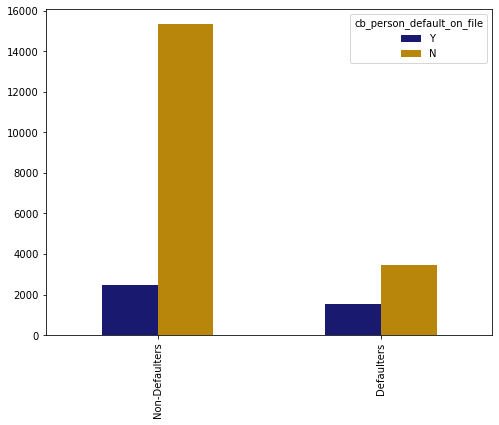

In [28]:
a= dfclean[dfclean['loan_status']==1].groupby('cb_person_default_on_file').size().sort_values()
b =dfclean[dfclean['loan_status']==0].groupby('cb_person_default_on_file').size().sort_values()
grade =pd.DataFrame(pd.concat([b,a],axis=1))
grade.columns=['Non-Defaulters','Defaulters']
print(grade)
grade.transpose().plot(kind='bar',figsize=(8,6),color=['#191970','#b8860b']);

In [29]:
print('Defaulters:')
print('Proportion of Defaulters on file',round(grade.iloc[0,1]/grade['Defaulters'].sum(axis=0)*100,3),'%')
print('Proportion of Defaultesr NOT on file',round(grade.iloc[1,1]/grade['Defaulters'].sum(axis=0)*100,3),'%')
print('---------------------------------------------------------------------------------------------------------------')
print('Non-Defaulters:')
print('Proportion of Non-Defaulters in file',round(grade.iloc[0,0]/grade['Non-Defaulters'].sum(axis=0)*100,3),'%')
print('Proportion of Non-Defaultesr NOT on file',round(grade.iloc[1,0]/grade['Non-Defaulters'].sum(axis=0)*100,3),'%')

Defaulters:
Proportion of Defaulters on file 30.89 %
Proportion of Defaultesr NOT on file 69.11 %
---------------------------------------------------------------------------------------------------------------
Non-Defaulters:
Proportion of Non-Defaulters in file 13.984 %
Proportion of Non-Defaultesr NOT on file 86.016 %


Which borrowers' loan intention are likely to to be defaulters?

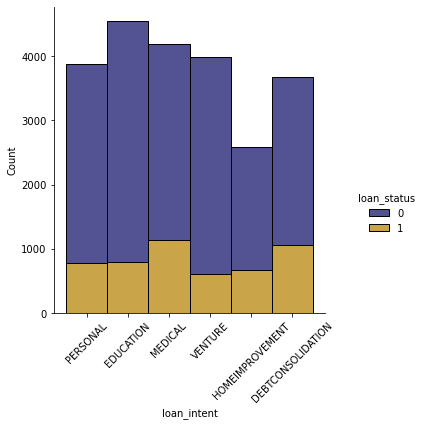

<Figure size 576x720 with 0 Axes>

In [30]:
sns.displot(data=dfclean ,x = "loan_intent", hue = "loan_status",multiple='stack',palette=['#191970','#b8860b'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(8,10));

# PART 2
dfclean.columns

subseting nuneric columns only

In [31]:
df_numeric =dfclean.select_dtypes('number')
for cols in df_numeric.columns:
    print(cols)
df_numeric.columns

person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_cred_hist_length


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

# Visualing the trend of whole numeric data

In [32]:
# plt.figure(figsize=(8,6))
# sns.pairplot(df_numeric,hue = 'loan_status',palette=['#191970','#b8860b'])

In [33]:
numeric_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 
               'loan_percent_income','cb_person_cred_hist_length']
for cols in numeric_col:
    print(cols)

person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_cred_hist_length


<Figure size 432x288 with 0 Axes>

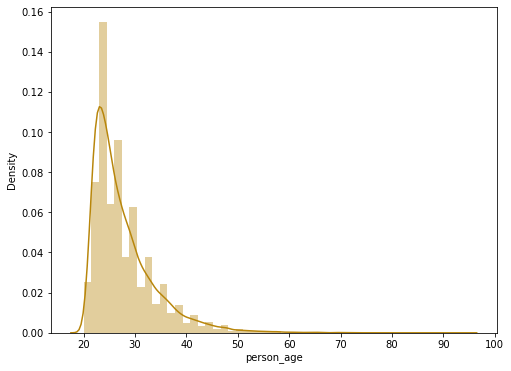

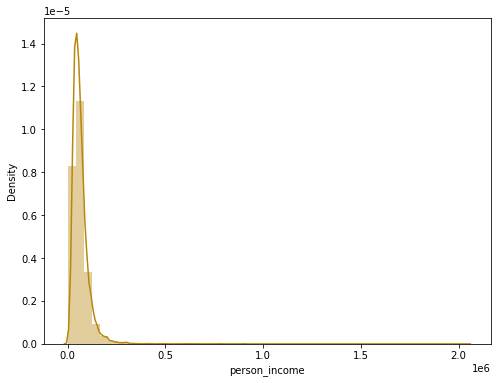

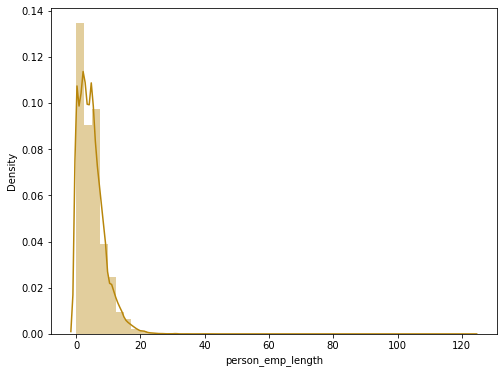

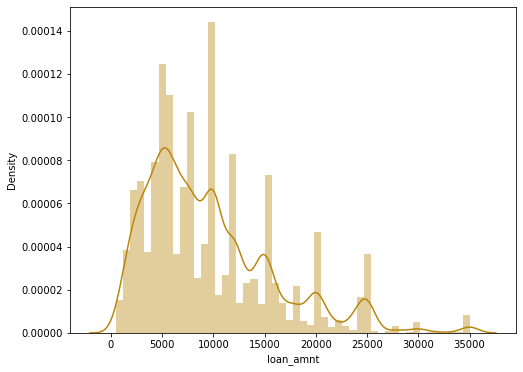

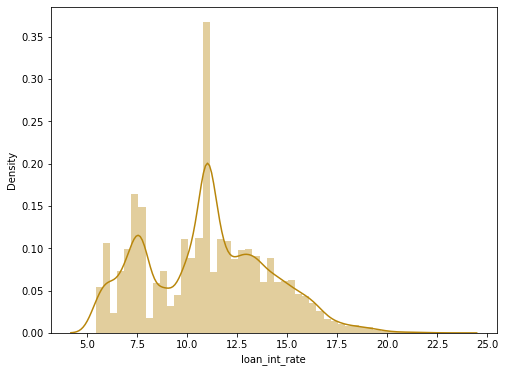

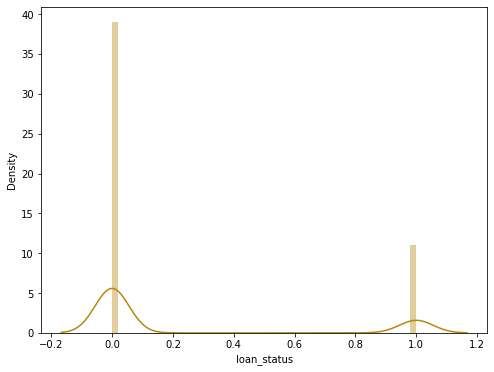

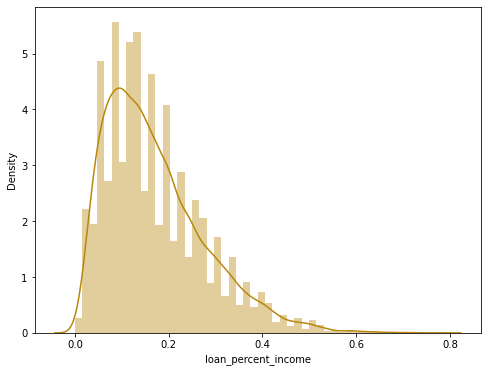

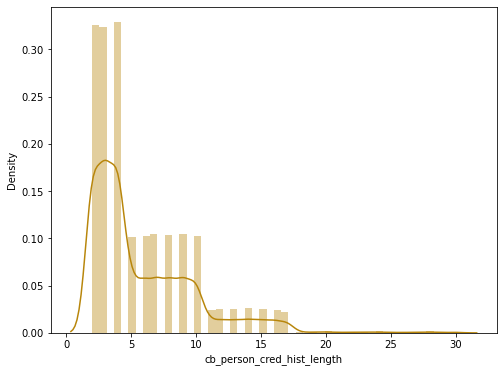

In [34]:
for i, col in enumerate(df_numeric.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    sns.distplot(df_numeric[col],color='#b8860b',kde=True)
   

Bucketting the loan amount into 4 groups

In [35]:
df_numeric["loan_amnt"].aggregate(['min','max'])

min      500
max    35000
Name: loan_amnt, dtype: int64

In [36]:
# Loan intervals
Loan_band = [500,5000,10000,20000,35000]

# create age bins
Groups = []
for i in range(4):
    Groups.append([Loan_band[i],Loan_band[i+1]])

# binning the data
for b in Groups:
    df_numeric.loc[df_numeric['loan_amnt'].between(left=b[0], right=b[1], inclusive='right'), 'Loan_Amount_Group'] = f'({b[0]},{b[1]}]'
df_numeric["Loan_Amount_Group"].value_counts()
df_numeric.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          23          65500                4.0      35000          15.23   
3          21           9900                2.0       2500           7.14   
4          26          77100                8.0      35000          12.42   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.53                           2   
3            1                 0.25                           2   
4            1                 0.45                           3   

  Loan_Amount_Group  
0     (20000,35000]  
1        (500,5000]  
2     (20000,35000]  
3        (500,5000]  
4     (20000,35000]

Non-Defaulters:
  Loan_Amount_Group  size
0     (10000,20000]  4642
1     (20000,35000]   971
2        (500,5000]  5267
3      (5000,10000]  6929
------------------------------------------------------------------------------------------------------------------
Defaulters:
  Loan_Amount_Group  size
0     (10000,20000]  1601
1     (20000,35000]   529
2        (500,5000]  1397
3      (5000,10000]  1507


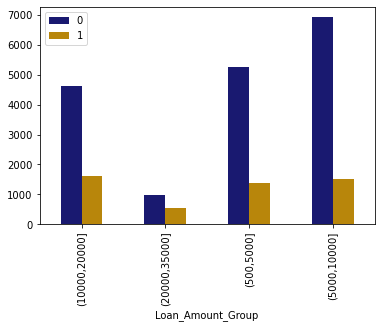

In [37]:
a_1=df_numeric[df_numeric['loan_status']==0].groupby(['Loan_Amount_Group']).size()
a_1.columns=[['Group','Number']]
print('Non-Defaulters:')
print(df_numeric[df_numeric['loan_status']==0].groupby(['Loan_Amount_Group'],as_index=False).size())
print('------------------------------------------------------------------------------------------------------------------')
print('Defaulters:')
print(df_numeric[df_numeric['loan_status']==1].groupby(['Loan_Amount_Group'],as_index=False).size())
a_2=df_numeric[df_numeric['loan_status']==1].groupby(['Loan_Amount_Group']).size()
a_2.columns=[['Group','Number']]
a12= pd.concat([a_1,a_2],axis=1)
a12.plot(kind='bar',color=['#191970','#b8860b']);

In [38]:
dfclean.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Figure size 432x576 with 0 Axes>

<Figure size 432x864 with 0 Axes>

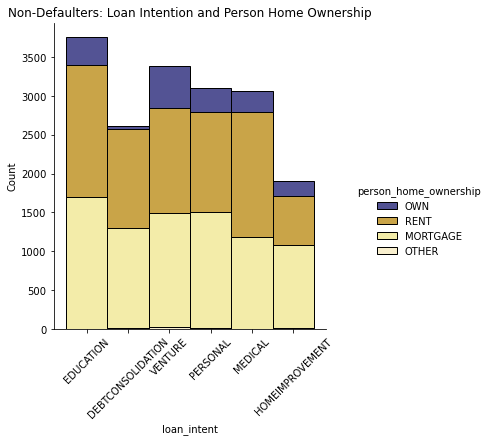

<Figure size 432x576 with 0 Axes>

In [39]:

plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "loan_intent", hue = "person_home_ownership",
            palette= ['#191970','#b8860b','#f0e68c','#f6eabe'],multiple='stack')
plt.title('Non-Defaulters: Loan Intention and Person Home Ownership')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))


2.Defaulters


[None, None, None, None, None, None, None, None, None, None, None, None]

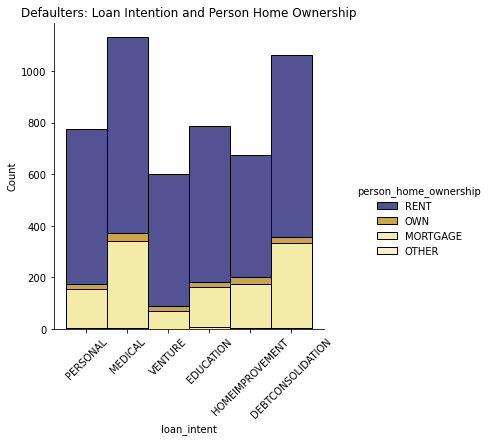

In [40]:
print('2.Defaulters')
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "loan_intent", hue = "person_home_ownership",multiple='stack'
,palette= ['#191970','#b8860b','#f0e68c','#f6eabe'])
plt.title('Defaulters: Loan Intention and Person Home Ownership')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Figure size 432x864 with 0 Axes>

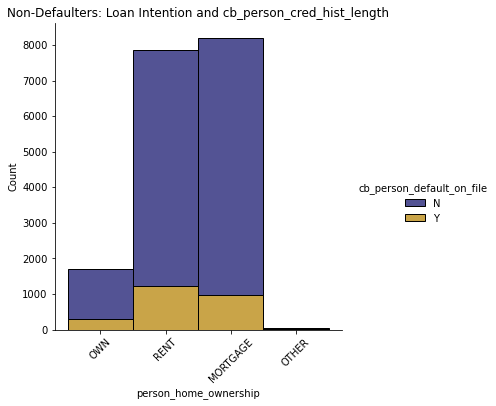

<Figure size 432x576 with 0 Axes>

In [41]:
plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "person_home_ownership", hue = "cb_person_default_on_file",
            multiple='stack',palette= ['#191970','#b8860b'])
plt.title('Non-Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))
dfclean.columns

<Figure size 432x576 with 0 Axes>

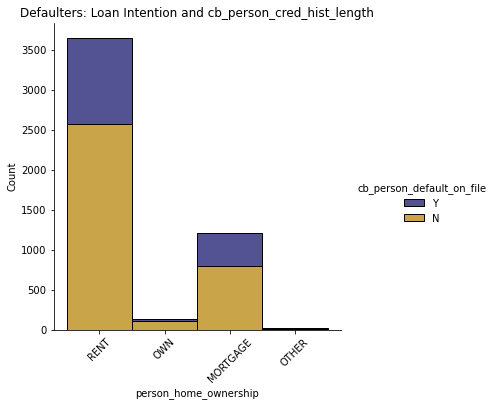

<Figure size 432x576 with 0 Axes>

In [42]:
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "person_home_ownership", hue = "cb_person_default_on_file",
            multiple='stack',palette= ['#191970','#b8860b'])
plt.title('Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))

[None, None, None, None, None, None, None, None, None, None, None, None]

<Figure size 432x864 with 0 Axes>

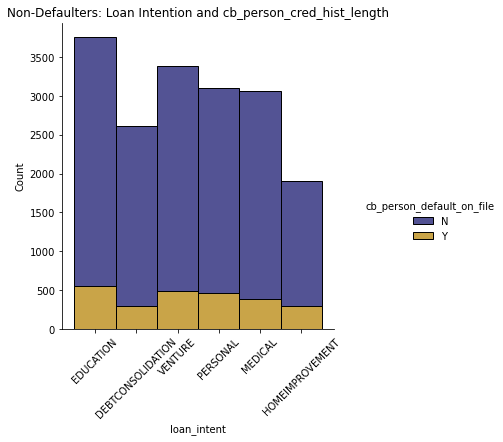

In [43]:
plt.figure(figsize=(6,12))
sns.displot(data=dfclean[dfclean['loan_status']==0] ,x = "loan_intent", hue = "cb_person_default_on_file",multiple='stack',
            palette= ['#191970','#b8860b'])
plt.title('Non-Defaulters: Loan Intention and cb_person_cred_hist_length')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

<Figure size 432x576 with 0 Axes>

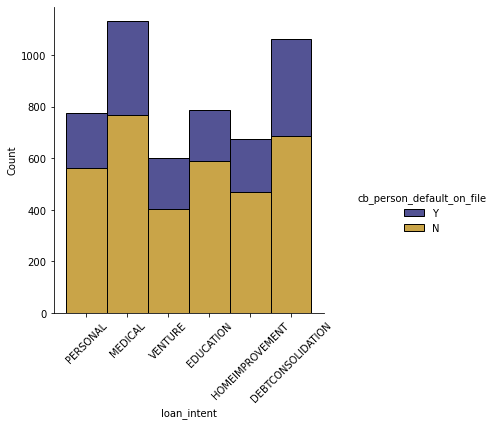

<Figure size 432x576 with 0 Axes>

In [44]:
sns.displot(data=dfclean[dfclean['loan_status']==1] ,x = "loan_intent", hue = "cb_person_default_on_file",
             palette= ['#191970','#b8860b'],multiple='stack')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize=(6,8))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

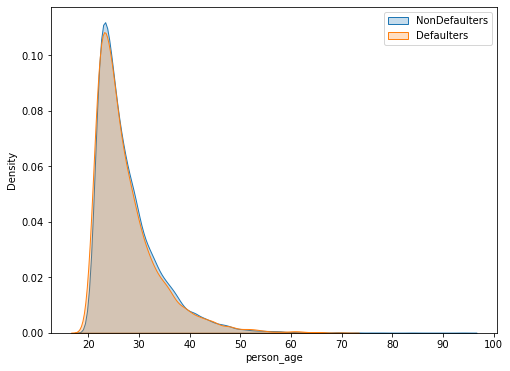

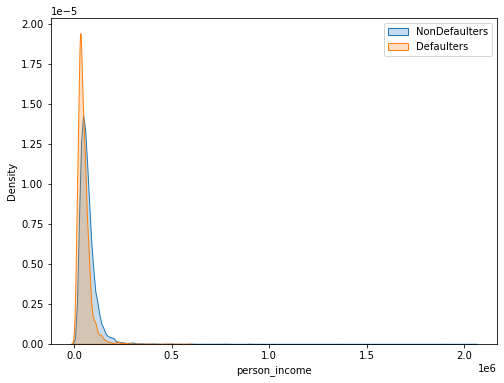

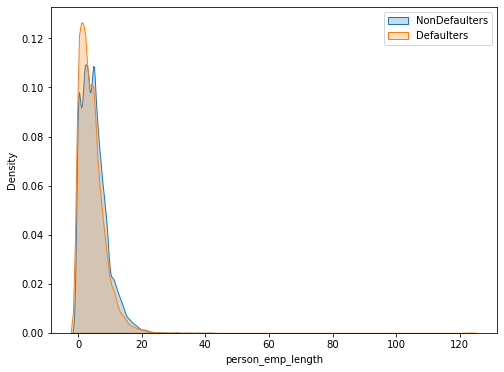

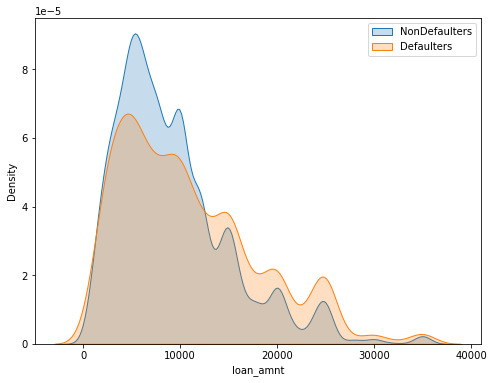

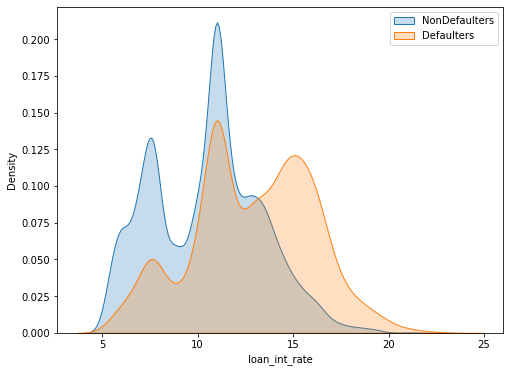

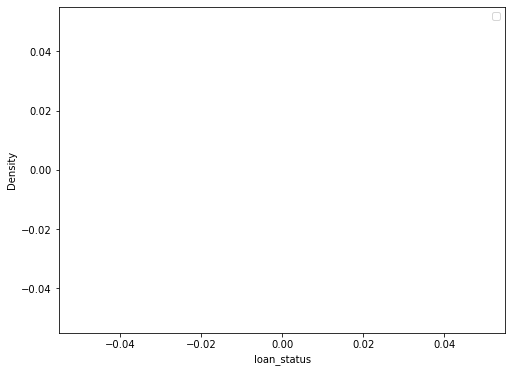

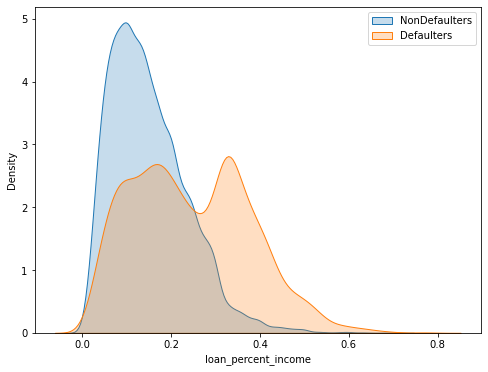

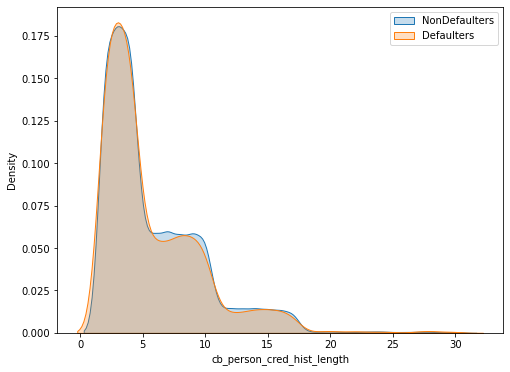

In [45]:
d=df_numeric.iloc[:,:-1]

for i,col in enumerate(d.columns):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    
    sns.kdeplot(d[d['loan_status']==0][col],shade=True,palette= ['#191970','#b8860b'],label='NonDefaulters')
    sns.kdeplot(d[d['loan_status']==1][col],shade=True,palette= ['#191970','#b8860b'],label='Defaulters')
    plt.legend();

# Predictive Analytics

In [46]:
df.select_dtypes('object').columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [47]:
#prepare
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

#models
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Model Evalution
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve

In [48]:
target ='loan_status'
y = dfclean[target]
X = dfclean.drop(columns = target)
print("target shape:",y.shape)
print('features shape:',X.shape)

target shape: (22847,)
features shape: (22847, 11)


In [49]:
#Encoding
from sklearn import preprocessing 
en = preprocessing.OrdinalEncoder()
X_en = en.fit_transform(X)

In [50]:
#Imputing
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp= imp_mean.fit_transform(X_en)

In [51]:
#Standardization
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_imp)

In [52]:
#partituoning data
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.3,random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',X_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15992, 11)
X_test shape: (6855, 11)
y_train shape: (15992, 11)
y_test shape: (6855,)


# Logistic Regression

In [53]:
#model
lrg = LogisticRegression(max_iter= 100, multi_class= 'auto', penalty='l2', solver= 'lbfgs')
md = lrg.fit(X_train,y_train)

In [54]:
#predict 
y_p=md.predict(X_test)

In [55]:
#Evaluate
accuracy_score(y_p,y_test)

0.8398249452954049

In [56]:
#Confusion Matrix
confusion_matrix(y_p,y_test)

array([[5048,  853],
       [ 245,  709]], dtype=int64)

In [57]:
#Classification report
print(classification_report(y_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5901
           1       0.45      0.74      0.56       954

    accuracy                           0.84      6855
   macro avg       0.70      0.80      0.73      6855
weighted avg       0.88      0.84      0.85      6855



# Logistic Regression Tuning
Uncommenting because it take longer to tune parameters

In [58]:
# param_lrg = dict(
#          penalty = ['l1', 'l2', 'elasticnet', 'none'],
#          solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
#          multi_class= ['auto','ovr','multinomial'],
#          max_iter = [100,120,130,140,150,160,170,180,190,200]
# )

# md = LogisticRegression()
# grid_lrg = GridSearchCV(md,param_grid =param_lrg, cv=5, verbose=True)
# grid_lrg.fit(X_train,y_train)
# print(grid_lrg.best_params_, grid_lrg.best_score_)
# y_pred=grid_lrg.predict(X_test)
# print(accuracy_score(y_pred,y_test))
# print(confusion_matrix(y,y_test))

# RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier_rft = RandomForestRegressor(
                                       criterion = 'mse',
                                       random_state = 4,max_features ='auto',
                                        max_depth = 300,
                                        n_estimators = 4)
classifier_rft.fit(X_train,y_train)

y_pred= classifier_rft.predict(X_test)
y_p1 = np.where(y_pred>=0.6,1,0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_p1))
print(classification_report(y_test,y_p1))
print(f1_score(y_test,y_p1))

0.9221006564551423
[[5223   70]
 [ 464 1098]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5293
           1       0.94      0.70      0.80      1562

    accuracy                           0.92      6855
   macro avg       0.93      0.84      0.88      6855
weighted avg       0.92      0.92      0.92      6855

0.8043956043956045


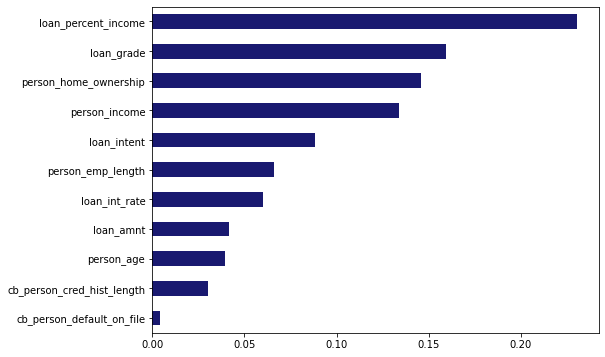

In [60]:
values = classifier_rft.feature_importances_
features = X.columns
pd.Series(values,features).sort_values().plot(kind='barh',color='#191970',figsize=(8,6));

# Random Forest Tuning
Uncommenting because it take longer to tune parameters

In [61]:
# param = dict(
# # n_estimators = [100,120,140,160,180,200,220,240,260,280,300],
# max_depth= np.arange(1,11),
# max_features = ['sqrt','log2','auto'],
# random_state=np.arange(1,11),
# criterion = ['mse','gini','entropy','log_loss'],
# )
# classifier1 = RandomForestRegressor()
# grid_se = GridSearchCV(classifier1,param_grid = param, cv=5, verbose=True)
# grid_se.fit(X_train,y_train)
# print(grid_se.best_params_, grid_sea.best_score_)
# y_pred=grid_se.predict(X_test)
# y_p1 = np.where(y_pred>=0.6,1,0)

# print(accuracy_score(y_p1,y_test))
# print(confusion_matrix(y_p1,y_test))
# print(classification_report(y_p1,y_test))

# Decision Tree

Decison Tree Classifier
0.9221006564551423
[[5266   27]
 [ 512 1050]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5293
           1       0.97      0.67      0.80      1562

    accuracy                           0.92      6855
   macro avg       0.94      0.83      0.87      6855
weighted avg       0.93      0.92      0.92      6855

0.7957559681697612


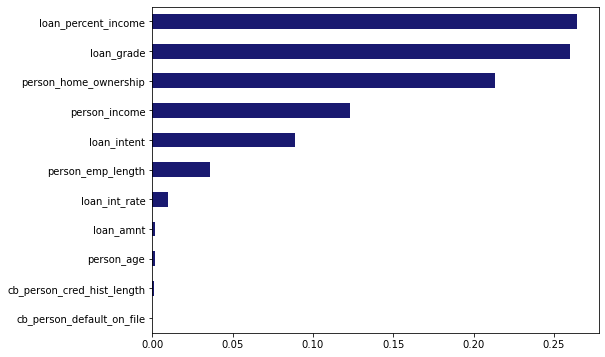

In [62]:
from sklearn.tree import DecisionTreeClassifier
#  ['criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf=2']

clf_entropy = DecisionTreeClassifier(
                       criterion = "entropy",
                       max_depth=9,
                       random_state=42,
                       min_samples_split =100,
                       min_samples_leaf=11)

clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
print('Decison Tree Classifier')
print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(f1_score(y_test,y_pred_en))


values = clf_entropy.feature_importances_
features = X.columns
pd.Series(values,features).sort_values().plot(kind='barh',color='#191970',figsize=(8,6));

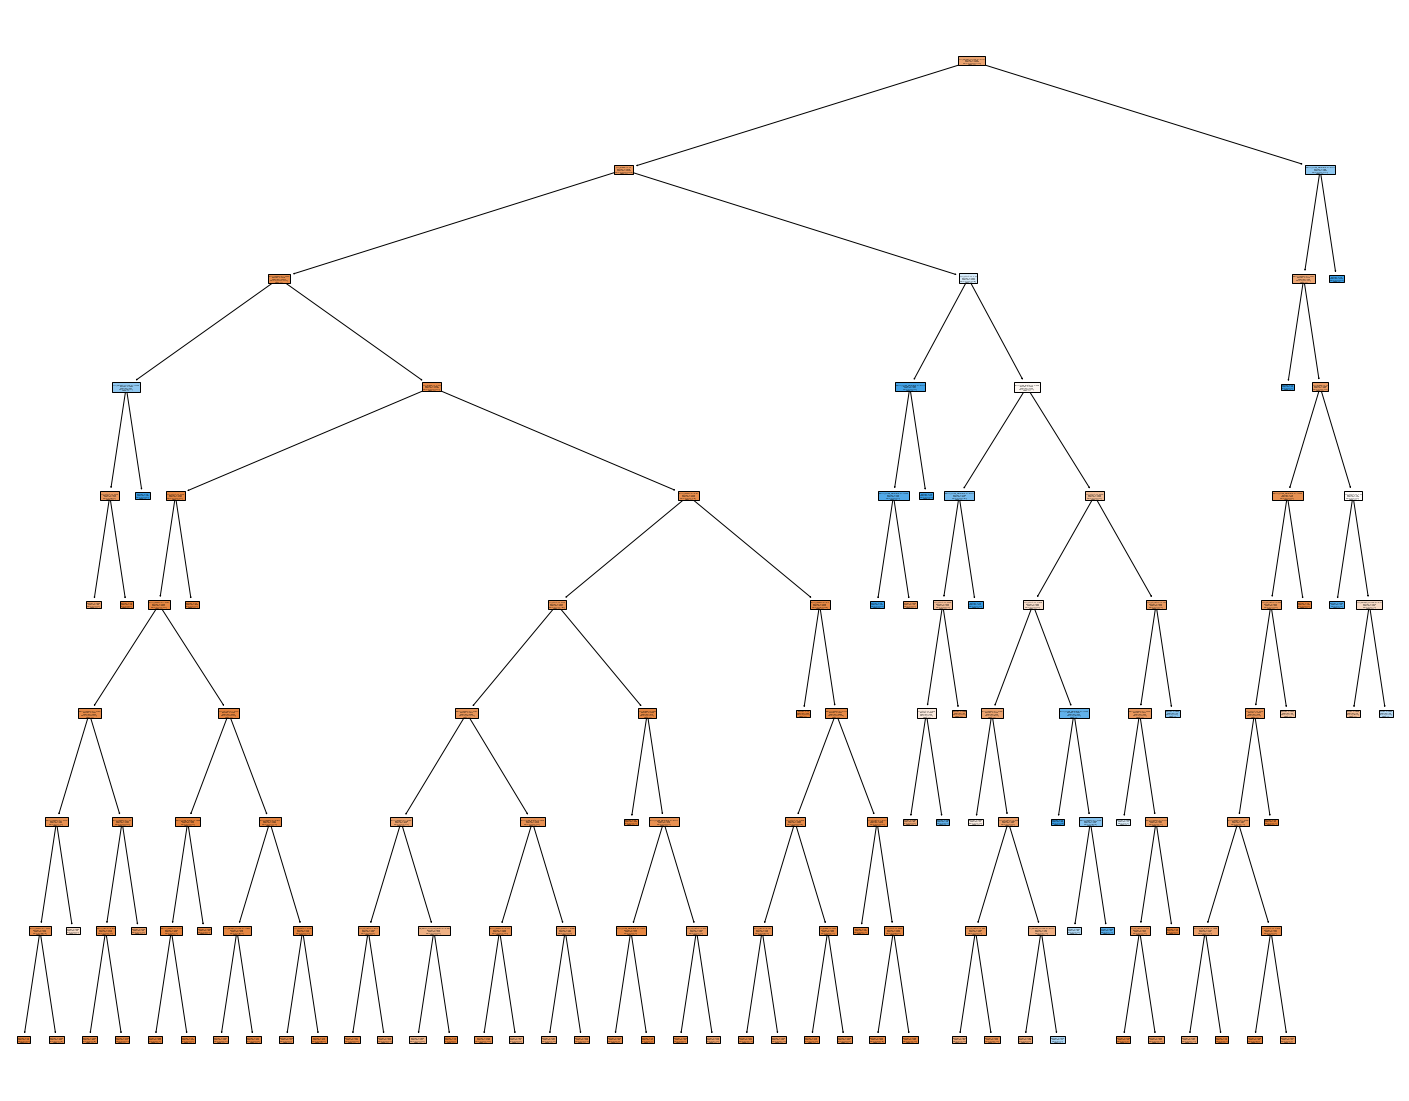

In [63]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(clf_entropy,
                feature_names = X.columns,
                class_names =['0','1'],
                filled=True)
# dfclean['loan_status'].unique()

# Decision Tree Classifier Tuning
Uncommenting because it take longer to tune parameters

In [64]:
# param_dtc = dict(
# criterion =["entropy",'gini','log_loss'],
# # max_features=np.arange(0,11), 
# min_samples_split = [3,5,10,20,40,60,80,100],
# # min_samples_leaf= np.arange(0,21),
# max_depth=np.arange(0,21)
# )
# classifier_dtc = DecisionTreeClassifier(random_state = 42)
# grid_dtc = GridSearchCV(param_dtc,param_grid = classifier_dtc, cv=5,n_jobs=-1, verbose=True,scoring='accuracy')
# grid_dtc.fit(X_train,y_train)
# print(grid.best_params_, grid.best_score_)
# y_p1=grid.predict(X_test)


# print(accuracy_score(y_p1,y_test))
# print(confusion_matrix(y_p1,y_test))
# print(classification_report(y_p1,y_test))

# Support Vector Machine

In [65]:
from sklearn import  svm

cls = svm.SVC(kernel ='rbf',gamma=1,C=10)
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred=pred))
print(confusion_matrix(y_test,y_pred=pred))
print('accuracy:',classification_report(y_test,y_pred=pred))

accuracy: 0.8514952589350839
[[4989  304]
 [ 714  848]]
accuracy:               precision    recall  f1-score   support

           0       0.87      0.94      0.91      5293
           1       0.74      0.54      0.62      1562

    accuracy                           0.85      6855
   macro avg       0.81      0.74      0.77      6855
weighted avg       0.84      0.85      0.84      6855



# Support Vector Machine Tuning

In [66]:
# param_svc = dict(
#       kernel =['linear','poly','sigmoid','rbf'],
#       degree =  np.arange(0,10,1),
#       gamma =[0.01,1,10],
#       C =  [0.1, 1, 10, 100, 1000]
# )

# classifier_svc = svm.SVC()
# grid_svc = GridSearchCV(classifier_svc,param_grid = param_svc, cv=5, verbose=True)
# grid_svc.fit(X_train,y_train)
# print(grid_svc.best_params_, grid_svc.best_score_)
# y_pred=grid_svc.predict(X_test)


# print(accuracy_score(y_pred,y_test))
# print(confusion_matrix(y_pred,y_test))
# print(classification_report(y_pred,y_test))

# Xgboost Parameter Tuning

In [67]:
import xgboost as xgb
train = xgb.DMatrix(X_train,label=y_train)
test =  xgb.DMatrix(X_test,label=y_test)

param_xg = {

            'booster':'gbtree',
            'max_depth':4 ,
            'eta' : 0.3,
            'objective':'multi:softmax',
            'num_class':3 
}   
epochs =10

model = xgb.train(param_xg,train,epochs)
predictions = model.predict(test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9218088986141503
[[5273   20]
 [ 516 1046]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5293
           1       0.98      0.67      0.80      1562

    accuracy                           0.92      6855
   macro avg       0.95      0.83      0.87      6855
weighted avg       0.93      0.92      0.92      6855



# KNeighbor Parameter Tuning

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

model = classifier.fit(X_train,y_train)
model = classifier.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-------------------------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,model.predict(X_test)))
print('\nAccuracy_score: \n',accuracy_score(y_test,model.predict(X_test)))
print('\nclassification_report\n',classification_report(y_test,model.predict(X_test)))


-------------------------------------------------
Confusion Matrix: 
 [[5136  157]
 [ 773  789]]

Accuracy_score: 
 0.8643326039387309

classification_report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      5293
           1       0.83      0.51      0.63      1562

    accuracy                           0.86      6855
   macro avg       0.85      0.74      0.77      6855
weighted avg       0.86      0.86      0.85      6855



# KNeighbor Parameter Tuning

In [70]:
k_metr = ['euclidean','minkowski']
scores = []

for k in k_metr:
    model = KNeighborsClassifier(metric = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
print(scores)

[0.862582056892779, 0.862582056892779]


In [71]:
k_p = range(1,26)
scores = []

for k in k_p :
    model = KNeighborsClassifier(p = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

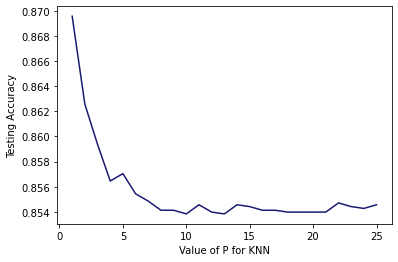

In [72]:
plt.plot(k_p,scores,color='#191970')
plt.xlabel('Value of P for KNN')
plt.ylabel('Testing Accuracy');

# Principal Component Analysis

person_age                    0.220576
person_income                 0.186396
person_home_ownership         0.146344
person_emp_length             0.135793
loan_intent                   0.090724
loan_grade                    0.078616
loan_amnt                     0.064084
loan_int_rate                 0.052215
loan_percent_income           0.011013
cb_person_default_on_file     0.008822
cb_person_cred_hist_length    0.005417
dtype: float64


<AxesSubplot:>

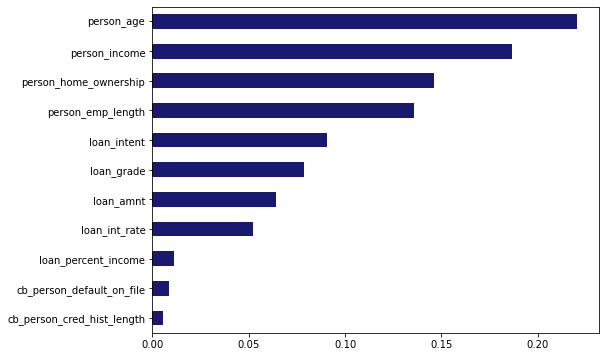

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
x_pca = pca.fit_transform(X_sc)

print(pd.Series(pca.explained_variance_ratio_,X.columns))
pd.Series(pca.explained_variance_ratio_,X.columns).sort_values().plot(kind='barh',color='#191970',figsize=(8,6))

In [74]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(X_sc)
X_train_pca,X_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=42)
x_pca.shape

(22847, 6)

# Logistic Regression Principal Component Analysis

(22847, 5)
0.8316557257476295
(22847, 5)


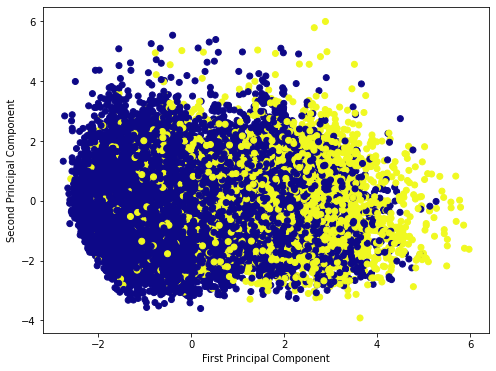

In [75]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(X_sc)
X_train_pca,X_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=42)
print(x_pca.shape)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
print(model.score(X_test_pca,y_test))

plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 2], c =dfclean['loan_status'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
print(x_pca.shape)

# Random Forest Classifier Principal Component Analysis

(22847, 11)
0.8550280956000353
(22847, 11)


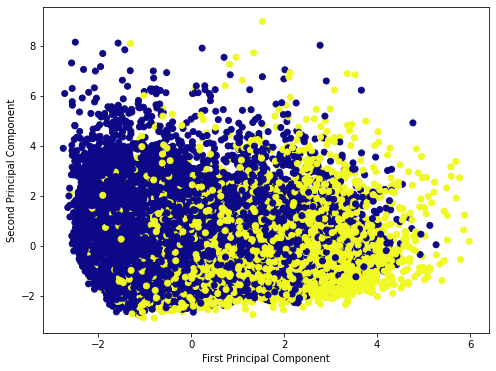

In [76]:
pca = PCA(n_components=11)
x_pca = pca.fit_transform(X_sc)
X_train_pca,X_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=42)
print(x_pca.shape)

classifier_rft =classifier_rft = RandomForestRegressor(
                                       criterion = 'mse',
                                       random_state = 4,max_features ='auto',
                                        max_depth = 300,
                                        n_estimators = 4)
classifier_rft.fit(X_train_pca,y_train)
print(classifier_rft.score(X_train_pca,y_train)) 

plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c =dfclean['loan_status'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
print(x_pca.shape)

# Decision Tree Classifier Principal Component Analysis

(22847, 11)
0.8838169084542271
(22847, 11)


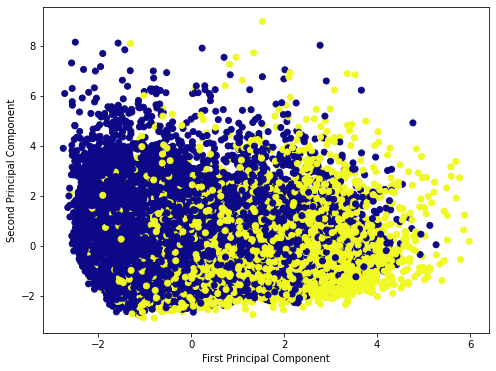

In [77]:
pca = PCA(n_components=11)
x_pca = pca.fit_transform(X_sc)
X_train_pca,X_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=42)
print(x_pca.shape)

dt = DecisionTreeClassifier(
                       criterion = "entropy",
                       max_depth=9,
                       random_state=42,
                       min_samples_split =100,
                       min_samples_leaf=11)
dt.fit(X_train_pca,y_train)
print(dt.score(X_train_pca,y_train)) 

plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c =dfclean['loan_status'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
print(x_pca.shape)

# Fine tuning by Excluding Less Importance Features below

In [78]:
#  Features Index
num = np.array([0,1,2,3,4,5,6,7,8,9,10])
print(pd.Series(num,X.columns))


# Important Features index in order  
# 8,5,2,1,4,3,7
X_t= X[['loan_percent_income','loan_grade','person_home_ownership','person_income','person_emp_length','loan_intent']]

#Test 1 7 features
X_trainimp = X_train[:,[8,5,2,1,4,3,7]]       #Best
X_testimp = X_test[:,[8,5,2,1,4,3,7]]

#Test 2 6 features
# X_trainimp = X_train[:,[8,5,2,1,4]]          #Good
# X_testimp = X_test[:,[8,5,2,1,4]] 

#Test 3 4 features
# X_trainimp = X_train[:,[8,5,2,1]]             #failr
# X_testimp = X_test[:,[8,5,2,1]]

person_age                     0
person_income                  1
person_home_ownership          2
person_emp_length              3
loan_intent                    4
loan_grade                     5
loan_amnt                      6
loan_int_rate                  7
loan_percent_income            8
cb_person_default_on_file      9
cb_person_cred_hist_length    10
dtype: int32


# LogisticRegression: Top Five Important Features

In [79]:
#model
lrg = LogisticRegression(max_iter= 100, multi_class= 'auto', penalty='l2', solver= 'lbfgs')
md = lrg.fit(X_trainimp,y_train)

y_p=md.predict(X_testimp)

#Evaluate
print(accuracy_score(y_p,y_test))

#Confusion Matrix
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

0.837490882567469
[[5046  867]
 [ 247  695]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5913
           1       0.44      0.74      0.56       942

    accuracy                           0.84      6855
   macro avg       0.70      0.80      0.73      6855
weighted avg       0.88      0.84      0.85      6855



# Random Forest & Bagging Top Five Important Features

In [80]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(

    base_estimator = RandomForestClassifier(),
    n_estimators = 100,
    max_samples = 0.9,
    oob_score = True,
    random_state = 42
)
bag_model.fit(X_trainimp,y_train)
bag_model.oob_score_
y_pred = bag_model.predict(X_testimp)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9273522975929979
[[5274   19]
 [ 479 1083]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      5293
           1       0.98      0.69      0.81      1562

    accuracy                           0.93      6855
   macro avg       0.95      0.84      0.88      6855
weighted avg       0.93      0.93      0.92      6855

0.8130630630630631


In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier_rft = RandomForestRegressor(random_state=42)
# criterion = 'mse',random_state = 4,max_features ='auto',
#                                    max_depth = 300,n_estimators = 4)
classifier_rft.fit(X_trainimp,y_train)

y_pred= classifier_rft.predict(X_testimp)
y_p1 = np.where(y_pred>0.5,1,0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_p1))
print(classification_report(y_test,y_p1))
print(f1_score(y_test,y_p1))

0.9277899343544858
[[5243   50]
 [ 445 1117]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5293
           1       0.96      0.72      0.82      1562

    accuracy                           0.93      6855
   macro avg       0.94      0.85      0.89      6855
weighted avg       0.93      0.93      0.92      6855

0.818614877244412


# Decision Tree : Top Five Important Features

In [82]:
bag_dt = BaggingClassifier(

    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.9,
    oob_score = True,
    random_state = 42
)
bag_dt.fit(X_trainimp,y_train)
bag_dt.oob_score_
bag_dt.fit(X_trainimp,y_train)
print(bag_dt.oob_score_)
y_pred = bag_dt.predict(X_testimp)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9285267633816908
0.9282275711159738
[[5249   44]
 [ 448 1114]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5293
           1       0.96      0.71      0.82      1562

    accuracy                           0.93      6855
   macro avg       0.94      0.85      0.89      6855
weighted avg       0.93      0.93      0.92      6855

0.8191176470588236


In [83]:
from sklearn.tree import DecisionTreeClassifier
#  = ['criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf=2']

clf_entropy = DecisionTreeClassifier(
                       criterion = "entropy",
                       max_depth=11,
#                        max_features = 'log2',
                       random_state=42,
                       min_samples_split =100,
                       min_samples_leaf = 8
)


clf_entropy.fit(X_trainimp, y_train)
y_pred_en = clf_entropy.predict(X_testimp)

print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(f1_score(y_test,y_pred_en))

0.9277899343544858
[[5256   37]
 [ 495 1067]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5293
           1       0.97      0.68      0.80      1562

    accuracy                           0.92      6855
   macro avg       0.94      0.84      0.88      6855
weighted avg       0.93      0.92      0.92      6855

0.8004501125281321


# Support Vector Machine : Top five Important Features

In [84]:
from sklearn import  svm

cls = svm.SVC(kernel ='rbf',gamma=1,C=10)
cls.fit(X_trainimp,y_train)
pred = cls.predict(X_testimp)
print('accuracy:',accuracy_score(y_test,y_pred=pred))
print(confusion_matrix(y_test,y_pred=pred))
print('accuracy:',classification_report(y_test,y_pred=pred))

accuracy: 0.8952589350838803
[[5089  204]
 [ 514 1048]]
accuracy:               precision    recall  f1-score   support

           0       0.91      0.96      0.93      5293
           1       0.84      0.67      0.74      1562

    accuracy                           0.90      6855
   macro avg       0.87      0.82      0.84      6855
weighted avg       0.89      0.90      0.89      6855



# XGBOOST: Top Five  Important  Features

In [85]:
import xgboost as xgb
train = xgb.DMatrix(X_trainimp,label=y_train)
test =  xgb.DMatrix(X_testimp,label=y_test)

param_xg = {

            'booster':'gbtree',
            'max_depth':4 ,
            'eta' : 0.3,
            'objective':'multi:softmax',
            'num_class':3 
}   
epochs =10

model = xgb.train(param_xg,train,epochs)
predictions = model.predict(test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


0.9216630196936543
[[5272   21]
 [ 516 1046]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5293
           1       0.98      0.67      0.80      1562

    accuracy                           0.92      6855
   macro avg       0.95      0.83      0.87      6855
weighted avg       0.93      0.92      0.92      6855



# Kneighbor : To Five Important Features

In [86]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

model = classifier.fit(X_trainimp,y_train)

from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-------------------------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,model.predict(X_testimp)))
print('\nAccuracy_score: \n',accuracy_score(y_test,model.predict(X_testimp)))
print('\nclassification_report\n',classification_report(y_test,model.predict(X_testimp)))


-------------------------------------------------
Confusion Matrix: 
 [[5128  165]
 [ 635  927]]

Accuracy_score: 
 0.8832968636032094

classification_report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      5293
           1       0.85      0.59      0.70      1562

    accuracy                           0.88      6855
   macro avg       0.87      0.78      0.81      6855
weighted avg       0.88      0.88      0.88      6855



# Gradient Bootsing Classifier Parameter Tuning
Uncommenting because it take longer to tune parameter

In [87]:
# from sklearn.ensemble import GradientBoostingClassifier
# params = {
    
# #     'loss' : ['log_loss','deviance','exponential'],
# #     'learning_rate' : [0.001,0.1,0.5,0.7,0.9],
# #     'n_estimators' : [100,110,120,130,140,150,160,170,180,190,200] ,
# #     'subsample' : [0.1,0.2,0.3,0.6,0.9],
# #     'criterion' : ['friedman_mse','squared_error'],
# #     'max_features' :['auto','sqrt','log2','int','float'],
# #     'max_depth' : [100,110,120]
# }

# gbr = GradientBoostingClassifier(random_state = 42)
# md = GridSearchCV(gbr,params,cv=5)
# md.fit(X_train,y_train)

# print(md.best_params_,md.best_score_)

# print(accuracy_score(y_test,predictions))
# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))

# Final Model 
it takes approximately 5 minute to fine tune the parameters

In [88]:
pipelines = {
    'Logistic_Regression_L1_Penalty' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=1, 
                                                                                          solver='liblinear')),
    
    'Logistic_Regression_L2_Penalty' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1, 
                                                                                          solver='liblinear')),
    
    'Random_Forest_Classifier' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1)),
    'Gradient_Boosting_Classifier' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
}



Logistic_Regression_L1_Penalty_hyperparameters = {
    'logisticregression__C' : [0.1, 1, 10]
}

Logistic_Regression_L2_Penalty_hyperparameters = {
    'logisticregression__C' : [0.1, 1, 10]
}

Random_Forest_Classifierf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 0.3, 0.6]
}

Gradient_Boosting_Classifier_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

hyperparameters = {
    'Logistic_Regression_L1_Penalty' : Logistic_Regression_L1_Penalty_hyperparameters, 
    'Logistic_Regression_L2_Penalty' : Logistic_Regression_L2_Penalty_hyperparameters,
    'Random_Forest_Classifier' : Random_Forest_Classifierf_hyperparameters,
    'Gradient_Boosting_Classifier' : Gradient_Boosting_Classifier_hyperparameters
}


models = {}

for key in pipelines.keys() :
    models[key] = GridSearchCV(pipelines[key], hyperparameters[key], cv=5)

for key in models.keys():
    models[key].fit(X_train, y_train)
    print(key, 'is trained and tuned.')

Logistic_Regression_L1_Penalty is trained and tuned.
Logistic_Regression_L2_Penalty is trained and tuned.
Random_Forest_Classifier is trained and tuned.
Gradient_Boosting_Classifier is trained and tuned.


In [109]:
for i in models.keys():
    print('----------Evaluation Metrics For',i,'---------------------------------')
    y[i]= models[i].predict(X_test)
    print('\nAccuracy Score:',accuracy_score(y_test,y[i]))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y[i]))
    print('Classification Report:\n',classification_report(y_test,y[i]))    

----------Evaluation Metrics For Logistic_Regression_L1_Penalty ---------------------------------

Accuracy Score: 0.8401167031363967
Confusion Matrix:
 [[5049  244]
 [ 852  710]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5293
           1       0.74      0.45      0.56      1562

    accuracy                           0.84      6855
   macro avg       0.80      0.70      0.73      6855
weighted avg       0.83      0.84      0.83      6855

----------Evaluation Metrics For Logistic_Regression_L2_Penalty ---------------------------------

Accuracy Score: 0.8398249452954049
Confusion Matrix:
 [[5048  245]
 [ 853  709]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5293
           1       0.74      0.45      0.56      1562

    accuracy                           0.84      6855
   macro avg       0.80      0.70      0.73    

In [110]:
for i in models.keys():
    print('\nThe accuracy Score of',i,accuracy_score(y_test,y[i]))   


The accuracy Score of Logistic_Regression_L1_Penalty 0.8401167031363967

The accuracy Score of Logistic_Regression_L2_Penalty 0.8398249452954049

The accuracy Score of Random_Forest_Classifier 0.9286652078774617

The accuracy Score of Gradient_Boosting_Classifier 0.9324580598103575


                                Model_Scores
Gradient_Boosting_Classifier        0.932458
Random_Forest_Classifier            0.928665
Logistic_Regression_L1_Penalty      0.840117
Logistic_Regression_L2_Penalty      0.839825


<AxesSubplot:>

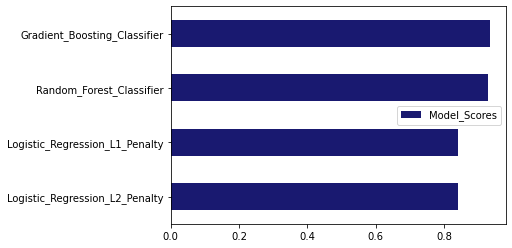

In [111]:
model_scores = {}
for i in models.keys():
    model_scores[i] = accuracy_score(y_test,y[i])
modelscore = pd.DataFrame.from_dict(model_scores,orient='index',columns = ['Model_Scores'])
print(modelscore.sort_values(by='Model_Scores',ascending = False) )
modelscore.sort_values(by='Model_Scores',ascending = True).plot(kind='barh',color=['#191970'])

<Figure size 1008x576 with 0 Axes>

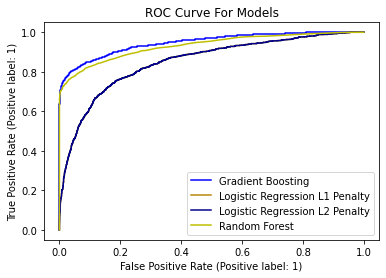

In [112]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(14,8))

disp = plot_roc_curve(models['Gradient_Boosting_Classifier'],X_test,y_test,color='b',
                      label='Gradient Boosting')

plot_roc_curve(models['Logistic_Regression_L1_Penalty'],X_test,y_test,ax=disp.ax_,color='#b8860b',
               label='Logistic Regression L1 Penalty');

plot_roc_curve(models['Logistic_Regression_L2_Penalty'],X_test,y_test,ax=disp.ax_,color='darkblue',
              label='Logistic Regression L2 Penalty');

plot_roc_curve(models['Random_Forest_Classifier'],X_test,y_test,ax=disp.ax_,color='y',label='Random Forest');


plt.title('ROC Curve For Models');

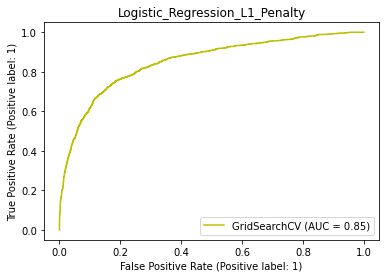

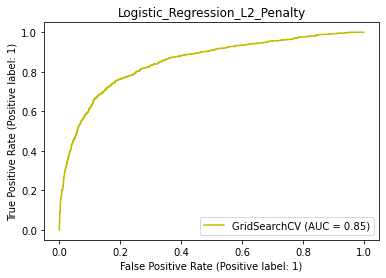

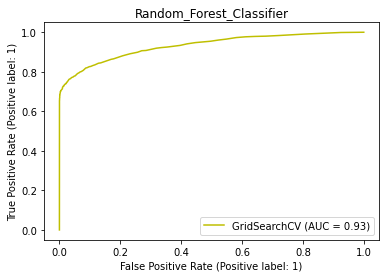

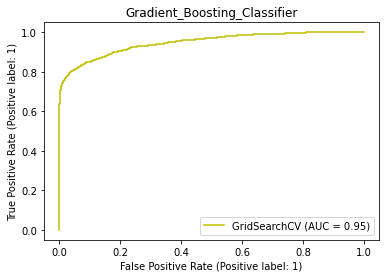

In [113]:
for i in models.keys():
    plot_roc_curve(models[i],X_test,y_test,color='y')
    plt.title(i)

In [114]:
# Option 2 ROC CURVE plot

# from sklearn import metrics
# # y_pred = model[].predict_proba(X_test)[:,1]
# # y_pred = model.predict_proba(X_test)[::,1]
# # fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)

# for i in models:
#     y[i] = models[i].predict_proba(X_test)[:,1]
#     fpr,tpr,_= metrics.roc_curve(y_test,y[i]) 
#     plt.plot(fpr,tpr)
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.title(i)
#     plt.show()          

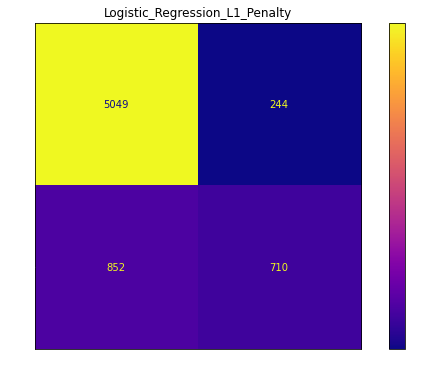

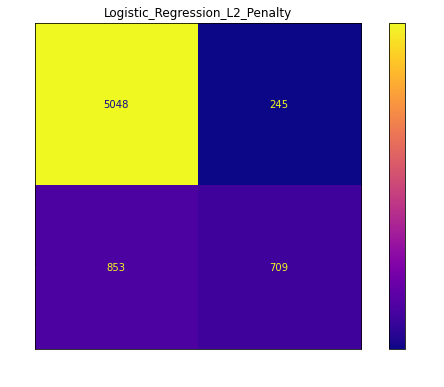

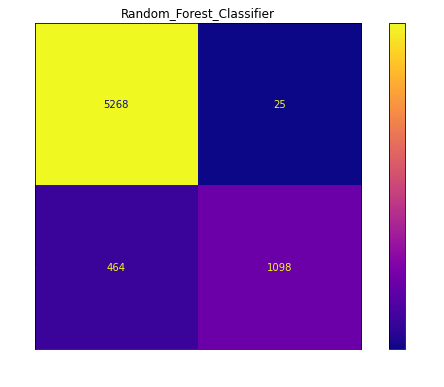

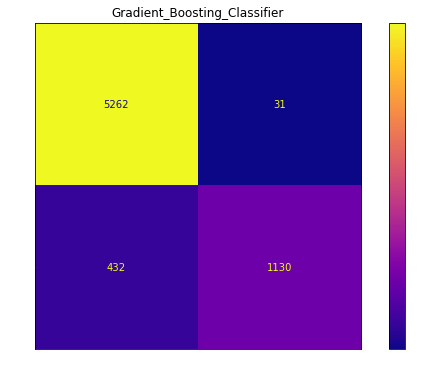

In [115]:
from sklearn.metrics import plot_confusion_matrix

for i in models.keys():
    matrix = plot_confusion_matrix(models[i],X_test,y_test,cmap='plasma')
#     matrix.ax_.set_title('Confusion Matrix',color='white')
    plt.title(i)
    plt.xlabel('Predicted Label',color='white')
    plt.ylabel('Actual Label',color='white')
    plt.gcf().axes[0].tick_params(colors='white')
    plt.ylabel('Actual Label',color='white')
    plt.gcf().axes[0].tick_params(colors='white')
    plt.gcf().axes[1].tick_params(colors='white')
    plt.gcf().set_size_inches(10,6)
    plt.show()
    

# Prediction of The New Dataset With the

# Best Model:Gradient Boosting Classifier

In [116]:
df1 =pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\DataScience\credit_risk_dataset_test.csv")
print(df1.shape)
df1.head()

(9731, 12)


person_age  person_income person_home_ownership  person_emp_length  \
0          25           9600              MORTGAGE                1.0   
1          24          54400                  RENT                8.0   
2          24          78956                  RENT                5.0   
3          26         108160                  RENT                4.0   
4          23          92111                  RENT                7.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0     MEDICAL          C       5500          12.87                 0.57   
1     MEDICAL          C      35000          14.27                 0.55   
2     MEDICAL          B      35000          11.11                 0.44   
3   EDUCATION          E      35000          18.39                 0.32   
4     MEDICAL          F      35000          20.25                 0.32   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                           3          NaN  
1                         Y                           4          NaN  
2                         N                           4          NaN  
3                         N                           4          NaN  
4                         N                           4          NaN

In [117]:
df_test = df1.iloc[:,:-1]
print(df_test.shape)
df_test.head()

(9731, 11)


person_age  person_income person_home_ownership  person_emp_length  \
0          25           9600              MORTGAGE                1.0   
1          24          54400                  RENT                8.0   
2          24          78956                  RENT                5.0   
3          26         108160                  RENT                4.0   
4          23          92111                  RENT                7.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0     MEDICAL          C       5500          12.87                 0.57   
1     MEDICAL          C      35000          14.27                 0.55   
2     MEDICAL          B      35000          11.11                 0.44   
3   EDUCATION          E      35000          18.39                 0.32   
4     MEDICAL          F      35000          20.25                 0.32   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                           3  
1                         Y                           4  
2                         N                           4  
3                         N                           4  
4                         N                           4

In [118]:
df_test.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             282
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 969
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [119]:
def clean_column(cols):
    avg = cols.mean()
    return cols.fillna(avg)

dftest = df_test.transform(clean_column)
dftest.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [120]:
#Encoding
from sklearn import preprocessing 
en = preprocessing.OrdinalEncoder()
X_e = en.fit_transform(dftest)

#Imputing
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_im= imp_mean.fit_transform(X_e)

#standadization
scaler = StandardScaler()
X_s = scaler.fit_transform(X_im)

In [121]:
prediction = models['Gradient_Boosting_Classifier'].predict(X_s)
df1['Loan_status'] = prediction
print(df1.shape)
df1.head()

(9731, 13)


person_age  person_income person_home_ownership  person_emp_length  \
0          25           9600              MORTGAGE                1.0   
1          24          54400                  RENT                8.0   
2          24          78956                  RENT                5.0   
3          26         108160                  RENT                4.0   
4          23          92111                  RENT                7.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0     MEDICAL          C       5500          12.87                 0.57   
1     MEDICAL          C      35000          14.27                 0.55   
2     MEDICAL          B      35000          11.11                 0.44   
3   EDUCATION          E      35000          18.39                 0.32   
4     MEDICAL          F      35000          20.25                 0.32   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                         N                           3          NaN   
1                         Y                           4          NaN   
2                         N                           4          NaN   
3                         N                           4          NaN   
4                         N                           4          NaN   

   Loan_status  
0            1  
1            1  
2            1  
3            1  
4            1

Non-Defaulters    8238
Defaulters        1493
Name: Loan_status, dtype: int64


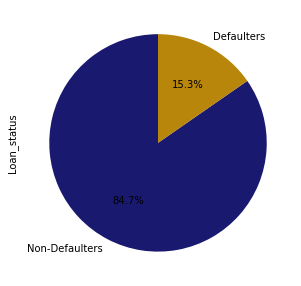

In [122]:
df1['Loan_status'].replace({0:'Non-Defaulters',1:'Defaulters'},inplace=True)
df1['Loan_status'].value_counts().plot(kind='pie',figsize=(5, 5),autopct='%1.1f%%',
                                         startangle=90, 
                                         colors = ['#191970', '#b8860b'])
print(df1['Loan_status'].value_counts())

In [123]:
predictions = {}
for i in models.keys():
    predictions[i] =models[i].predict(X_s) 
predict= pd.DataFrame.from_dict(predictions,orient='index')
predict = predict.transpose()
predict.columns = [['LogisticL1','LogisticL2','RandomForest','GradientBoosting']]

for col in predict.columns:
    print(col)
    print(predict[col].value_counts(normalize=True))
    predict[col].replace({0:'Non-Defaulters',1:'Defaulters'},inplace=True)
#     predict[col].value_counts().plot(kind='pie',figsize=(5, 5),autopct='%1.1f%%',
#                                          startangle=90, 
#                                          colors = ['#191970', '#b8860b'])
predict.head()  

('LogisticL1',)
0    0.859727
1    0.140273
Name: (LogisticL1,), dtype: float64
('LogisticL2',)
0    0.859418
1    0.140582
Name: (LogisticL2,), dtype: float64
('RandomForest',)
0    0.853252
1    0.146748
Name: (RandomForest,), dtype: float64
('GradientBoosting',)
0    0.846573
1    0.153427
Name: (GradientBoosting,), dtype: float64


LogisticL1  LogisticL2 RandomForest GradientBoosting
0  Defaulters  Defaulters   Defaulters       Defaulters
1  Defaulters  Defaulters   Defaulters       Defaulters
2  Defaulters  Defaulters   Defaulters       Defaulters
3  Defaulters  Defaulters   Defaulters       Defaulters
4  Defaulters  Defaulters   Defaulters       Defaulters

In [124]:
preds = {}
for i in models.keys():
    preds[i] =pd.DataFrame(models[i].predict(X_s)).value_counts()

bin_v = []
for i in preds.keys():
    bin_v.append(i)
d=pd.DataFrame(bin_v,columns =['Prediction Category'] )

bin_val0 = []
bin_val1 = []

for j in preds.values():
    bin_val0.append(j[0])
for k in preds.values():
    bin_val1.append(k[1])
    
dd=pd.DataFrame(bin_val0,columns =['Predicted Non-Defaulters'] )
ddd =pd.DataFrame(bin_val1,columns =['Predicted Defaulters'] )
preds =pd.concat([d,dd],axis=1)
preds['Predicted Defaulters'] = ddd
preds

Prediction Category  Predicted Non-Defaulters  \
0  Logistic_Regression_L1_Penalty                      8366   
1  Logistic_Regression_L2_Penalty                      8363   
2        Random_Forest_Classifier                      8303   
3    Gradient_Boosting_Classifier                      8238   

   Predicted Defaulters  
0                  1365  
1                  1368  
2                  1428  
3                  1493

<AxesSubplot:xlabel='Prediction Category', ylabel='Number of Predictions'>

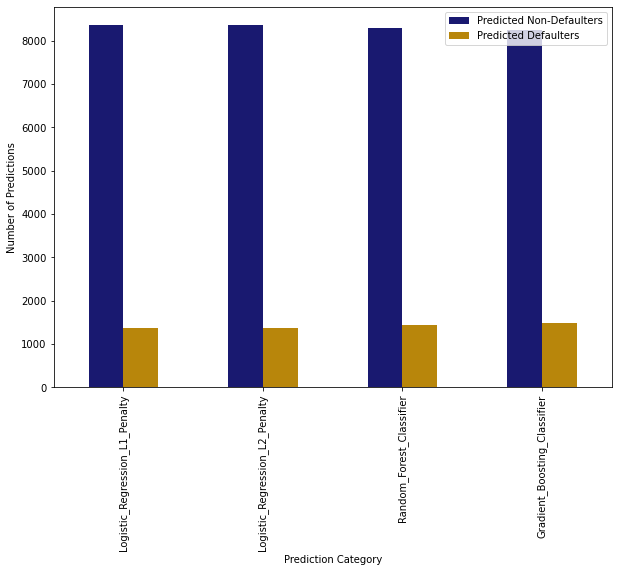

In [125]:
preds.set_index('Prediction Category',inplace=True)
preds.plot(kind='bar',color= ['#191970','#b8860b'],figsize=(10,7),
       xlabel='Prediction Category', ylabel='Number of Predictions')


In [126]:
print(predict.shape)
predict.head(20)

(9731, 4)


LogisticL1      LogisticL2    RandomForest GradientBoosting
0       Defaulters      Defaulters      Defaulters       Defaulters
1       Defaulters      Defaulters      Defaulters       Defaulters
2       Defaulters      Defaulters      Defaulters       Defaulters
3       Defaulters      Defaulters      Defaulters       Defaulters
4       Defaulters      Defaulters      Defaulters       Defaulters
5       Defaulters      Defaulters  Non-Defaulters   Non-Defaulters
6       Defaulters      Defaulters      Defaulters       Defaulters
7   Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
8       Defaulters      Defaulters      Defaulters       Defaulters
9       Defaulters      Defaulters      Defaulters       Defaulters
10  Non-Defaulters  Non-Defaulters      Defaulters       Defaulters
11  Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
12      Defaulters      Defaulters      Defaulters       Defaulters
13  Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
14  Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
15      Defaulters      Defaulters  Non-Defaulters   Non-Defaulters
16      Defaulters      Defaulters      Defaulters       Defaulters
17  Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
18  Non-Defaulters  Non-Defaulters  Non-Defaulters   Non-Defaulters
19      Defaulters      Defaulters      Defaulters       Defaulters

In [127]:
preds.transpose()

Prediction Category       Logistic_Regression_L1_Penalty  \
Predicted Non-Defaulters                            8366   
Predicted Defaulters                                1365   

Prediction Category       Logistic_Regression_L2_Penalty  \
Predicted Non-Defaulters                            8363   
Predicted Defaulters                                1368   

Prediction Category       Random_Forest_Classifier  \
Predicted Non-Defaulters                      8303   
Predicted Defaulters                          1428   

Prediction Category       Gradient_Boosting_Classifier  
Predicted Non-Defaulters                          8238  
Predicted Defaulters                              1493

In [128]:
preds.iloc[3,:]

Predicted Non-Defaulters    8238
Predicted Defaulters        1493
Name: Gradient_Boosting_Classifier, dtype: int64